In [121]:
import plotly.graph_objects as go

# Categories and values
categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
values = [20, 40, 30, 50, 60]
values2 = [40, 10, 80, 45, 18]
values.append(values[0])
values2.append(values2[0])

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=values,
      theta=categories + [categories[0]],
      fill='toself'
))

fig.add_trace(go.Scatterpolar(
      r=values2,
      theta=categories + [categories[0]],
      fill='toself'
))

# Update layout
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=True
)

# Show plot
fig.show()


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\20203011\OneDrive - TU Eindhoven\Documents\Uni\Visualisation\Match possession.csv")


In [289]:
df['id'][df['away_formation']=='5-3-2'].count()

59

<Axes: ylabel='Frequency'>

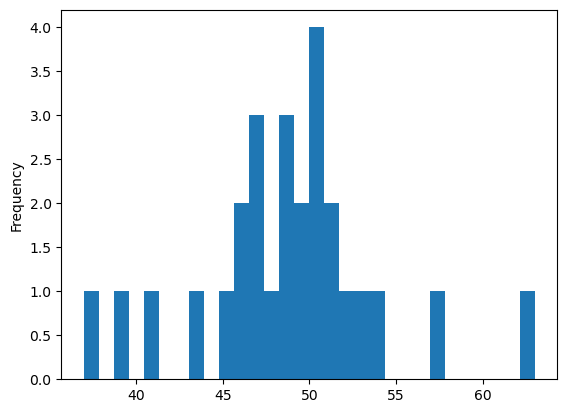

In [76]:
df.groupby(['away_formation'])['away_possession'].mean().plot(kind='hist', bins=30)

In [290]:
df_home = df[['home_formation', 'score_home', 'score_away', 'home_shot_on', 'home_shot_off', 'away_shot_on', 'away_shot_off', 'home_possession', 'home_cross']].copy()
df_away = df[['away_formation', 'score_home', 'score_away', 'home_shot_on', 'home_shot_off', 'away_shot_on', 'away_shot_off', 'away_possession', 'away_cross']].copy()
df_away = df_away.rename(columns={'away_formation': 'home_formation','score_home':'score_away', 'score_away': 'score_home', 'home_shot_on':'away_shot_on', 'away_shot_on':'home_shot_on', 'home_shot_off': 'away_shot_off', 'away_shot_off': 'home_shot_off', 'away_possession': 'home_possession', 'away_cross':'home_cross'})
forms = []
for f in df_home['home_formation'].unique():
    forms.append(f)
for f2 in df_away['home_formation'].unique():
    if f2 not in df_home['home_formation'].unique():
        forms.append(f2)
bigforms = []
for x in forms:
    if df_home['home_formation'][df_home['home_formation']==x].count() + df_away['home_formation'][df_away['home_formation']==x].count() >=200:
        bigforms.append(x)
df_home = df_home[df_home['home_formation'].isin(bigforms)]
df_away = df_away[df_away['home_formation'].isin(bigforms)]

In [291]:
df_total = pd.concat([df_home, df_away], ignore_index=True).groupby(by=['home_formation'], as_index=True).mean()
def modified_z_score(series):
    median = series.median()
    mad = (series - series.mean()).abs().mean()
    modified_z = 0.6745 * (series - median) / mad
    return modified_z

# Normalize using modified Z-score and then scale to [0, 100]
for col in df_total.columns:
    df_total[col] = modified_z_score(df_total[col])
    df_total[col] = (df_total[col] - df_total[col].min()) / (df_total[col].max() - df_total[col].min()) * 100
df_total

,score_home,score_away,home_shot_on,home_shot_off,away_shot_on,away_shot_off,home_possession,home_cross
home_formation,,,,,,,,
3-4-3,62.206620,26.021651,100.000000,51.534811,12.365462,13.193720,92.814609,0.000000
3-5-2,27.382292,26.660889,43.343670,30.085101,24.370544,27.591232,11.478011,11.921355
4-1-2-1-2,90.403188,48.344420,62.213994,82.445309,0.000000,0.000000,71.054586,36.390088
4-1-4-1,9.985504,57.104431,23.749711,0.000000,47.432412,14.759155,19.779583,7.695996
4-2-3-1,66.991820,27.768925,63.717242,36.350573,15.230526,1.176847,57.860664,60.689803
4-3-1-2,76.813848,9.700681,77.552277,100.000000,18.457645,51.221141,83.312805,33.998352
4-3-2-1,43.784883,40.103994,24.848258,60.212932,34.144917,29.530314,46.925595,0.988309
4-3-3,100.000000,0.000000,87.851266,86.977945,11.254528,2.311193,100.000000,38.925544
4-4-1-1,22.675400,51.390000,35.888325,26.289233,59.903046,53.473645,0.545058,100.000000


<Axes: ylabel='Frequency'>

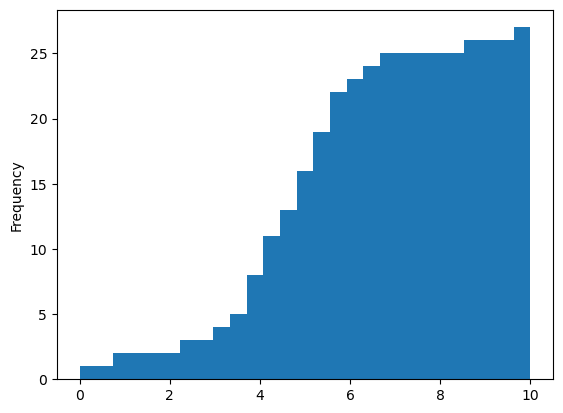

In [224]:
df_total['home_possession'].plot(kind='hist', cumulative=True, bins=27)

In [223]:
len(df_total)

27

In [293]:
# Create radar chart
fig = go.Figure()

values1=df_total.loc['4-3-3'].tolist()
values1.append(values1[0])
values2=df_total.loc['4-4-2'].tolist()
values2.append(values2[0])
categories = df_total.columns.tolist()

fig.add_trace(go.Scatterpolar(
      r=values1,
      theta=categories + [categories[0]],
      fill='toself'
))

fig.add_trace(go.Scatterpolar(
      r=values2,
      theta=categories + [categories[0]],
      fill='toself'
))

# Update layout
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=True
)

# Show plot
fig.show()